Author: La Rocca Marco 0001058673

### Exam for Machine Learning Python Lab
Consider the file ML-Python-Lab-Data.csv, explore the data, drop the columns that you consider useless for the classification and find the best classification scheme.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.

In [33]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Variables
file_name = 'ML-Python-Lab-Data.csv'
separator = ','
random_state = 42
target = 'Rings'

# Directives
%matplotlib inline                          
np.random.seed(random_state)                

### 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots

In [34]:
#--Load the data from the file
X = pd.read_csv(file_name, delimiter = separator, header=None, names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'], index_col=None)
#--Show the size
print ("The size is: {}".format(X.shape))

#--Show the structure of DataFrame
X.describe()

The size is: (4177, 9)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


In [35]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.0700,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.2100,1.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,NaN,1.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
encoder = make_column_transformer((OneHotEncoder(), ['Sex']), remainder = 'drop')
Xtrans = encoder.fit_transform(X)
enc = pd.DataFrame(Xtrans, columns = encoder.get_feature_names_out())
enc

,onehotencoder__Sex_F,onehotencoder__Sex_I,onehotencoder__Sex_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4172,1.0,0.0,0.0
4173,0.0,0.0,1.0
4174,0.0,0.0,1.0
4175,1.0,0.0,0.0


In [37]:
enc.rename(columns = {'onehotencoder__Sex_F': 'Female', 'onehotencoder__Sex_I':'Indefinite', 'onehotencoder__Sex_M':'Male'}, inplace = True)
enc

,Female,Indefinite,Male
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4172,1.0,0.0,0.0
4173,0.0,0.0,1.0
4174,0.0,0.0,1.0
4175,1.0,0.0,0.0


In [38]:
X.drop(columns = ['Sex'], inplace = True)
newX = pd.concat([enc, X], axis = 1)
newX

,Female,Indefinite,Male,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
1,0.0,0.0,1.0,0.350,0.265,0.090,NaN,0.0995,0.0485,0.0700,0.0
2,1.0,0.0,0.0,0.530,0.420,0.135,NaN,0.2565,0.1415,0.2100,1.0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,NaN,1.0
4173,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0
4175,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


In [17]:
#Transform categorial data(Sex) into new boolean attributes
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Set the transformer data type
transf_dtype = np.int32

# Instantiate the encoder only on needed columns and perform `fit_transform`
encoder = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore', sparse = False, dtype = transf_dtype), ['Sex']), remainder='passthrough')
transformed = encoder.fit_transform(X)

#Since `fit_transform` returns an `ndarray`, but a dataframe is needed
encX = pd.DataFrame(transformed, columns = encoder.get_feature_names_out())
encX.rename(columns = {'onehotencoder__x0_F':'Female', 'onehotencoder__x0_I':'Indefinite', 'onehotencoder__x0_M':'Male'}, inplace = True)                   #renaming of the freshly added columns
encX

C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names'

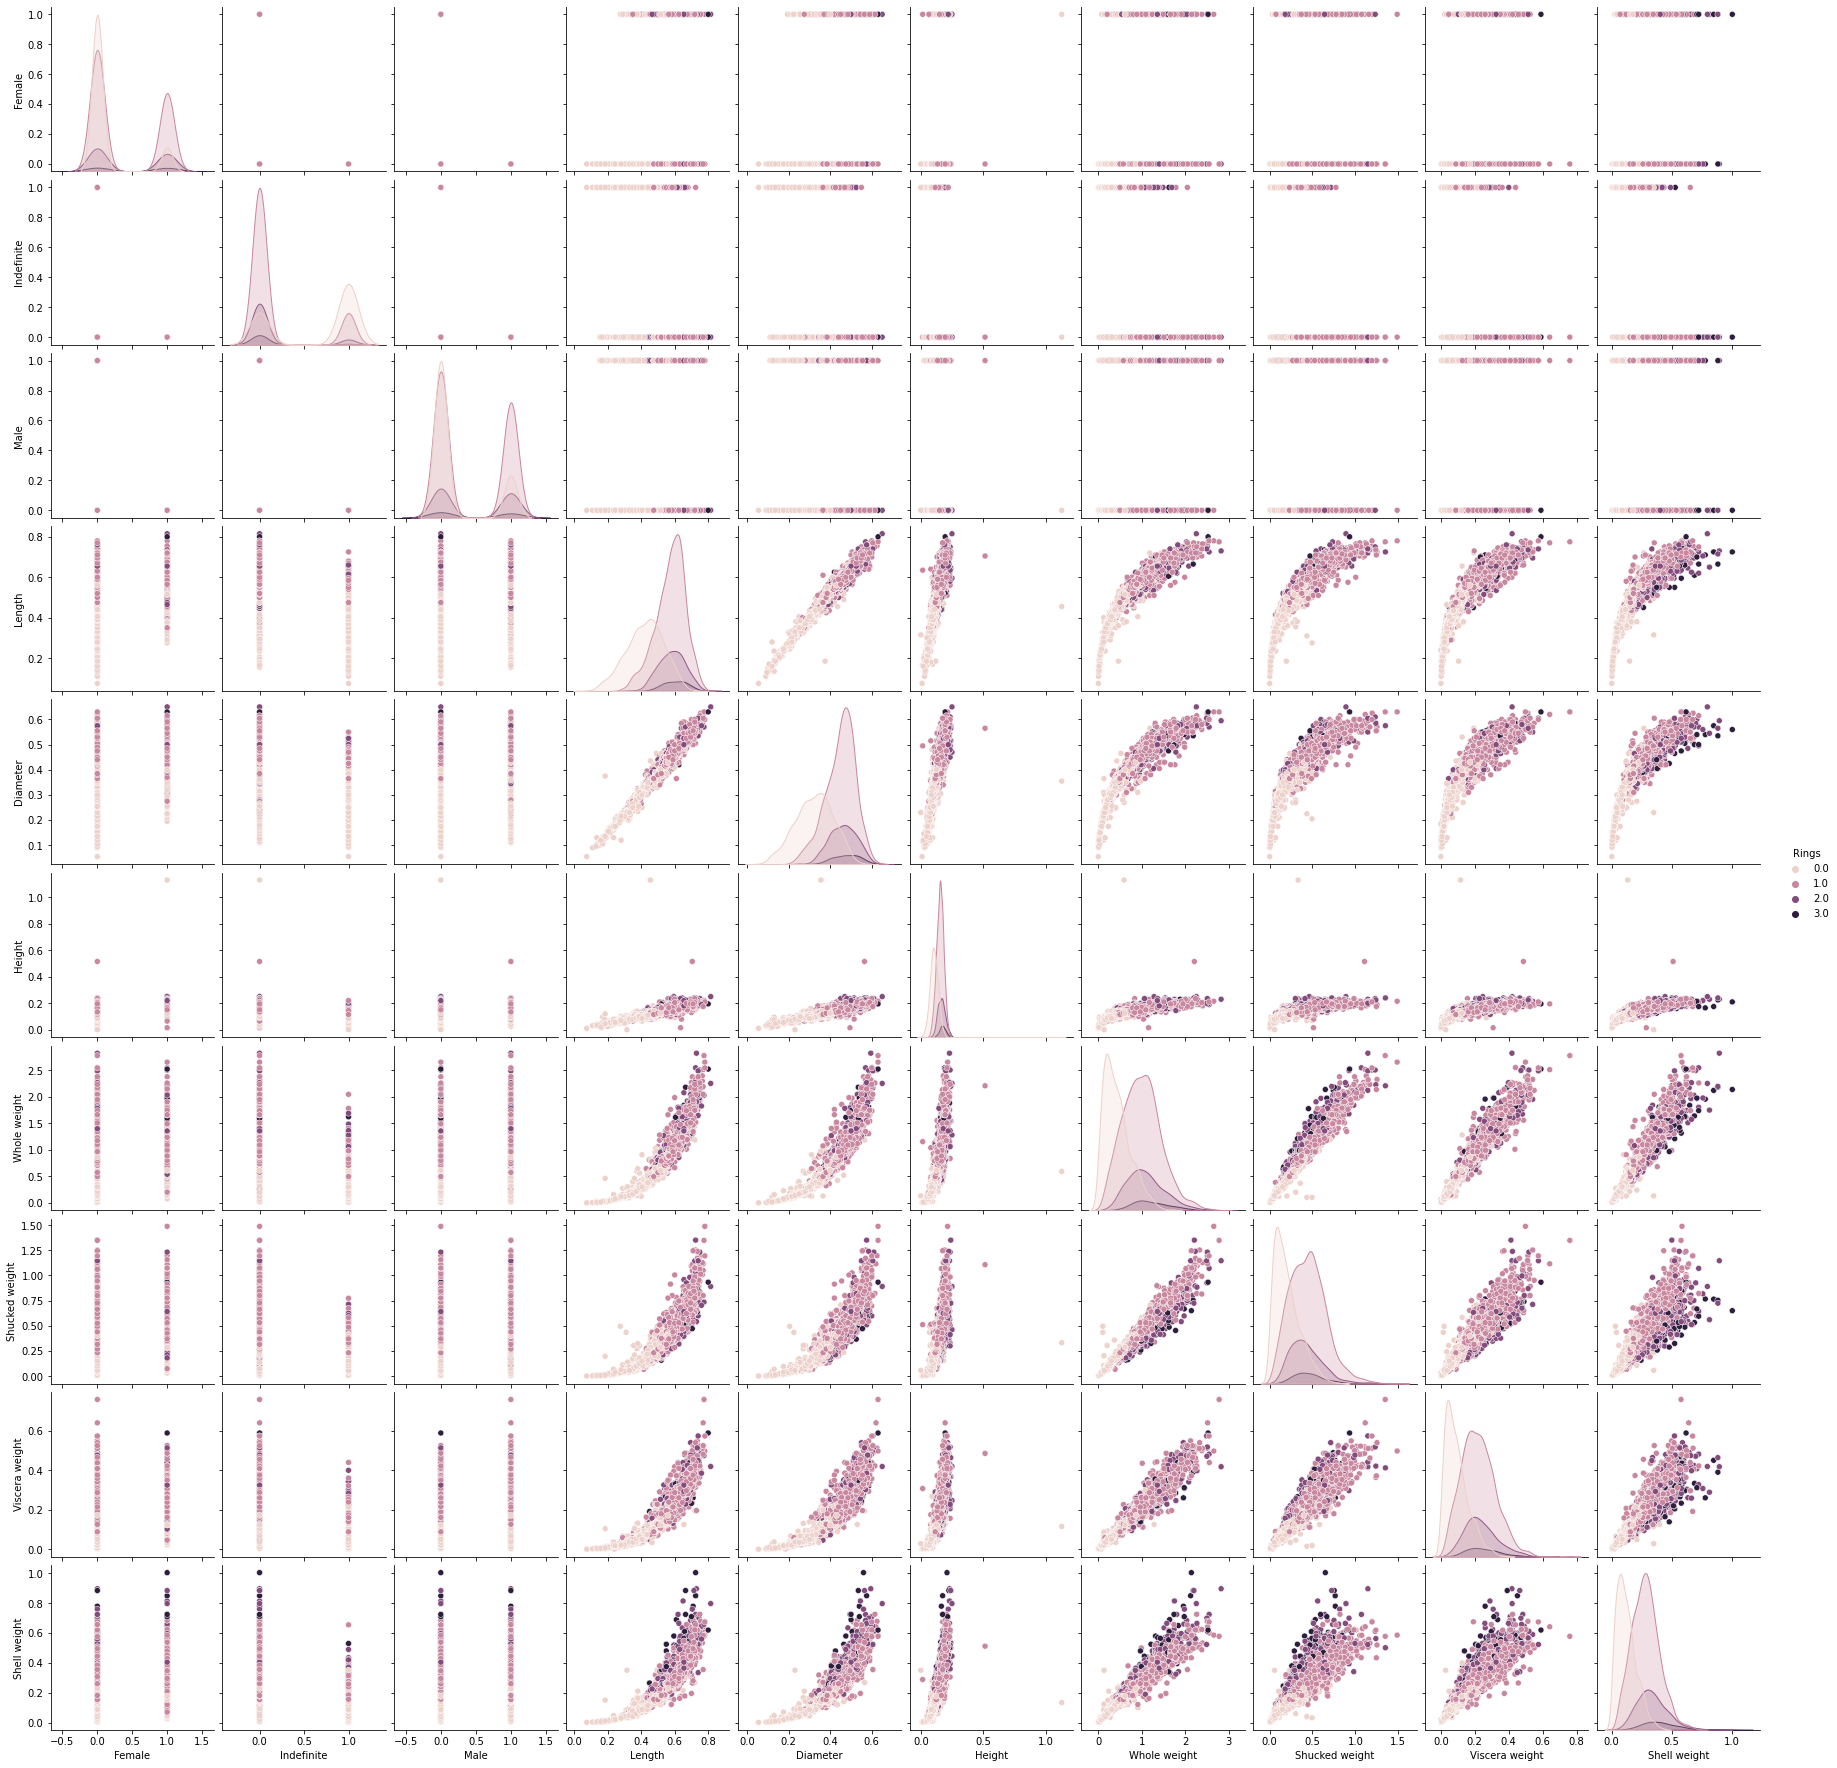

In [22]:
#--Data distribution with pairplot
sns.pairplot(encX, hue=target)

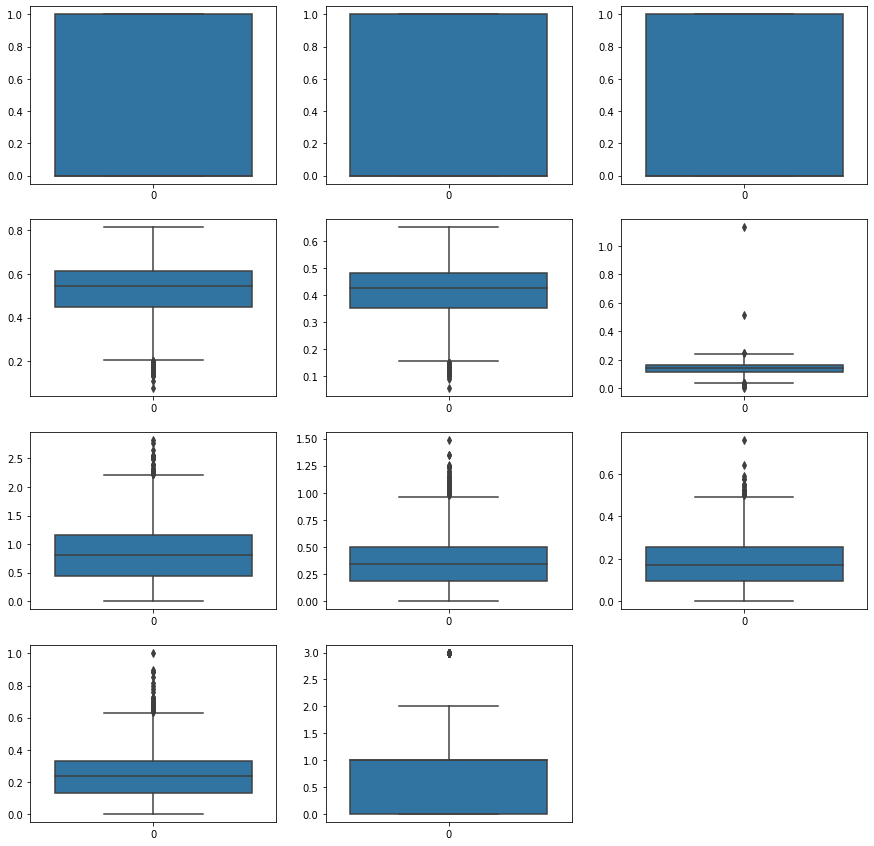

In [26]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in encX.columns:
        if(type(encX[i][0]) != str):
                plt.subplot(4, 3, pos)
                sns.boxplot(encX[i])
                pos += 1

In [27]:
#Check the number of rows with missing values

rows_missingvalues = encX.isna().any(axis=1).sum()
print("Rows with missing values: {}".format(rows_missingvalues))

Rows with missing values: 1125


### 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

Few outliers are present for every attribute and along all classes. 
Median values are stable and happen to be in the middle of the distribution of most attributes (except the target class).
There is no particular imbalanced distribution.
There are 1125 missing values.

### 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any

In [28]:
# Eliminate the rows containing null values and show the number of remaining rows
X_cl = encX.dropna()

# Show the number of remaining rows
print(f"The cleaned dataframe contains {X_cl.shape[0]} rows")

The cleaned dataframe contains 3052 rows


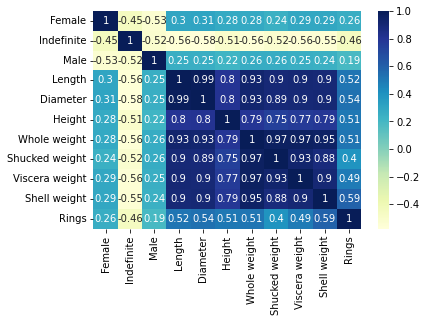

In [29]:
#Correlation matrix
correlation_matrix = X_cl.corr();
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

Except from Male and Female, all attributes are relevant in the same way since correlation with the target is similar.
Shucked weight is the less relevant but not by much.


In [30]:
# Drop Male and Female column
X_cl = X_cl.drop(columns = ['Male', 'Female'], axis = 1)
X_cl

,Indefinite,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
5,1.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0.0
6,0.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,3.0
...,...,...,...,...,...,...,...,...,...
4169,0.0,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,1.0
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


### 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In [31]:
X = X_cl.drop(target, axis = 1)
y = X_cl[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state)

In [32]:
X

,Indefinite,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,1.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
6,0.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
...,...,...,...,...,...,...,...,...
4169,0.0,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815
4173,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [33]:
# Instantiate the DecisionTree Classifier
dt = DecisionTreeClassifier(random_state = random_state)

# Fit it to the training data
dt.fit(Xtrain, ytrain)

# Create the range of parameters to try during cross-validation
dt_depths = range(1, dt.get_depth() + 1)

# We will use GridSearchCV to perform cross-validation
# we need to create the parameter list in a specific way
# for it to work
dt_params = [{'max_depth': list(dt_depths), 'random_state': [random_state]}]

# Instantiate GridSearchCV
dt_gs = GridSearchCV(   dt,
                        dt_params,
                        cv=5,
                        scoring='f1_macro',             # as required
                        return_train_score = False,
                        n_jobs = 2,
                    )

# Fit it to the training data
dt_gs.fit(Xtrain, ytrain)

# Print the best parameters found
print(f"The best parameter found for the Decision Tree was {dt_gs.best_params_}")


The best parameter found for the Decision Tree was {'max_depth': 7, 'random_state': 42}


In [34]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier()

# Create the range of parameters to try during cross-validation
knn_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# We will use GridSearchCV to perform cross-validation
# we need to create the parameter list in a specific way
# for it to work
knn_params = [{'n_neighbors': knn_neighbors}]

# Instantiate GridSearchCV
knn_gs = GridSearchCV(  knn,
                        knn_params,
                        cv=5,
                        scoring='accuracy',             # as required
                        return_train_score = False,
                        n_jobs = 2,
                )

# Fit it to the training data
knn_gs.fit(Xtrain, ytrain)

# Print the best parameters found
print(f"The best parameter found for the Nearest Neighbors was {knn_gs.best_params_}")

The best parameter found for the Nearest Neighbors was {'n_neighbors': 10}


### 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_lbls = [
              'dt',  
             'knn'
            ]

# Set the parameters by cross-validation

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(max_depth = 7, random_state = random_state), 
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(n_neighbors=10),
       }
}

dictModel_pred = {}
dictModel_accuracy = {} 
dictModel_cm = {}


def multipleClassifiers(model):
    model.fit(Xtrain, ytrain)
    model_pred = model.predict(Xtest)
    model_accuracy = accuracy_score(ytest, model_pred) * 100
    model_cm = confusion_matrix(ytest, model_pred)

    dictModel_pred[model] = model_pred
    dictModel_accuracy[model] = model_accuracy
    dictModel_cm[model] = model_cm
    
    
for model_lb in model_lbls:
    model = models[model_lb]["estimator"]
    multipleClassifiers(model)
    print("\n"+str(model)+":")
    print("Accuracy: "+str(dictModel_accuracy[model]))
    print("Confusion matrix: ")
    print(dictModel_cm[model])
    print("Classification report: ")
    print(classification_report(ytest, dictModel_pred[model]))


DecisionTreeClassifier(max_depth=7, random_state=42):
Accuracy: 66.05504587155964
Confusion matrix: 
[[158  60   1   0]
 [ 36 286  44   0]
 [  3  84  59   1]
 [  0  12  18   1]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       219
         1.0       0.65      0.78      0.71       366
         2.0       0.48      0.40      0.44       147
         3.0       0.50      0.03      0.06        31

    accuracy                           0.66       763
   macro avg       0.61      0.48      0.49       763
weighted avg       0.65      0.66      0.64       763


KNeighborsClassifier(n_neighbors=10):
Accuracy: 67.75884665792923
Confusion matrix: 
[[179  39   1   0]
 [ 53 293  20   0]
 [  5  97  44   1]
 [  0  20  10   1]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       219
         1.0       0.65      0.80      0.72       366
         2.0

### 6. Comment the results

Results are similar with both classifiers, accuracy is not optimal. From the confusion matrix and from other performance measures, it's clear that these classifiers struggled with class 2 and 3. From the initial pairplot we could see that the dataset wasn't great to begin with. But performance obtained isn't great, but ok.